In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict
import time
import os 
import re
import string
import csv
import re
import math

Data Extraction

In [2]:
#feeding train data
X_train, y_train = [], []
with open('train.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row
    for row in reader:
        X_train.append(row[0])
        y_train.append(int(row[1]))

#feeding test data        
X_test, y_test = [], []
with open('test.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row
    for row in reader:
        X_test.append(row[0])
        y_test.append(int(row[1]))


Implementing Naive Bayes

In [3]:
class NaiveBayes:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.vocab = set()
        self.class_word_freq = defaultdict(lambda: defaultdict(int))
        self.class_total_words = defaultdict(int)
        self.total_documents = 0
    
    #data preprocessing
    def preprocess(self, text):
        text = text.lower()
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        return text
    
    def tokenize(self, text):
        return text.split()
    
    def fit(self, X_train, y_train, learning_rates):
        accuracies = []
        for alpha in learning_rates:
            self.alpha = alpha
            self.vocab = set()
            self.class_word_freq = defaultdict(lambda: defaultdict(int))
            self.class_total_words = defaultdict(int)
            self.total_documents = 0
            for i in range(len(X_train)):
                text = self.preprocess(X_train[i])
                words = self.tokenize(text)
                self.vocab.update(words)
                for word in words:
                    self.class_word_freq[y_train[i]][word] += 1
                    self.class_total_words[y_train[i]] += 1
                self.total_documents += 1
            y_pred = self.predict(X_train)
            accuracy = self.evaluate_acc(y_train, y_pred)
            accuracies.append(accuracy)
        return accuracies

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            text = self.preprocess(X_test[i])
            words = self.tokenize(text)
            scores = {c: math.log(self.class_total_words[c]/self.total_documents) for c in self.class_total_words}
            for word in words:
                if word not in self.vocab:
                    continue
                for c in self.class_total_words:
                    word_freq = self.class_word_freq[c][word]
                    scores[c] += math.log((word_freq + self.alpha) / (self.class_total_words[c] + self.alpha * len(self.vocab)))
            prediction = max(scores, key=scores.get)
            predictions.append(prediction)
        return predictions

    def evaluate_acc(self, y_true, y_pred):
        correct_predictions = 0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                correct_predictions += 1
        accuracy = correct_predictions / len(y_true)
        return accuracy

In [4]:
# instantiate NaiveBayes object
nb = NaiveBayes()

# fit the model with different learning rates
learning_rates = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5 ]
accuracies = nb.fit(X_train, y_train, learning_rates)

# Testing the Naive Bayes model
y_pred_test = nb.predict(X_test)
y_pred_train = nb.predict(X_train)

# Evaluating the model accuracy with test data
Test_accuracy = nb.evaluate_acc(y_test, y_pred_test)

# Evaluating the model accuracy with train data
Train_accuracy = nb.evaluate_acc(y_train, y_pred_train)

print("Accuracy on test data:", Test_accuracy)
print("Accuracy on training data:", Train_accuracy)

# print the accuracies for each learning rate
for i, acc in enumerate(accuracies):
    print(f"Accuracy on training data for learning rate  {learning_rates[i]}: {acc}")

Accuracy on test data: 0.81408
Accuracy on training data: 0.90492
Accuracy on training data for learning rate  0.1: 0.94856
Accuracy on training data for learning rate  0.25: 0.93704
Accuracy on training data for learning rate  0.5: 0.92556
Accuracy on training data for learning rate  0.75: 0.9182
Accuracy on training data for learning rate  1: 0.912
Accuracy on training data for learning rate  1.25: 0.90832
Accuracy on training data for learning rate  1.5: 0.90492


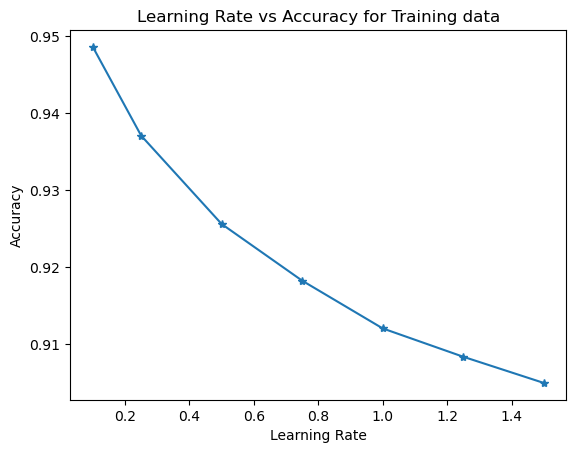

In [5]:
# plot the learning rate vs accuracy
plt.plot(learning_rates,accuracies, '-*')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for Training data')
plt.show()

In [6]:
# Test data cases

learning_rates = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5 ]

accuracies_test = nb.fit(X_test, y_test, learning_rates)

for i, acc in enumerate(accuracies_test):
    print(f"Accuracy on testing data for learning rate {learning_rates[i]}: {acc}")

Accuracy on testing data for learning rate 0.1: 0.95684
Accuracy on testing data for learning rate 0.25: 0.94624
Accuracy on testing data for learning rate 0.5: 0.93528
Accuracy on testing data for learning rate 0.75: 0.92812
Accuracy on testing data for learning rate 1: 0.9224
Accuracy on testing data for learning rate 1.25: 0.91824
Accuracy on testing data for learning rate 1.5: 0.91508


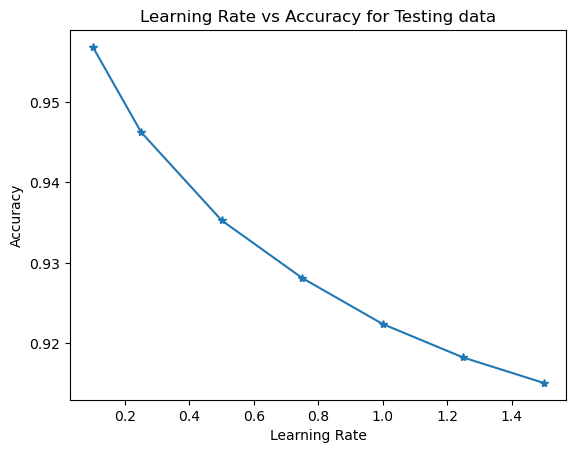

In [7]:
# plot the learning rate vs accuracy
plt.plot(learning_rates,accuracies_test, '-*')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for Testing data')
plt.show()

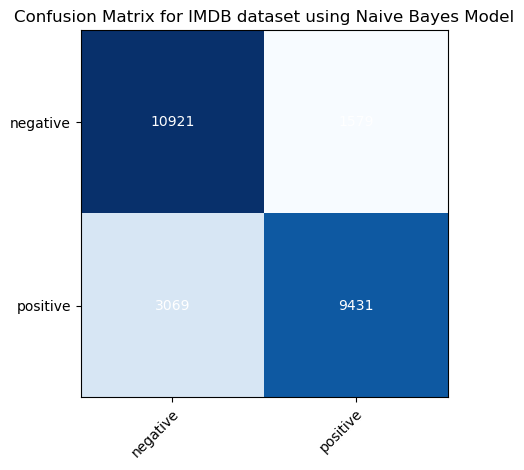

In [8]:
cm = confusion_matrix(y_test, y_pred_test)

# define class labels
classes = ['negative', 'positive']

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# rotate x-tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data to print actual values
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="white")

ax.set_title("Confusion Matrix for IMDB dataset using Naive Bayes Model")
fig.tight_layout()
plt.show()

<Axes: >

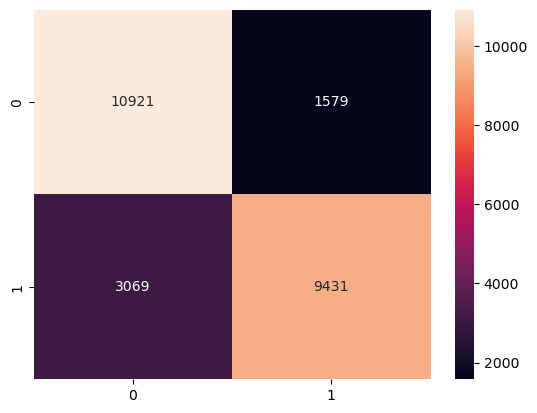

In [9]:
sns.heatmap(cm,annot=True,fmt='d')

In [10]:
tn=10921;
fn=1579;
fp=3069;tp=9431;

n=tn+fp
p=fn+tp

print("total actual negative points %d"%(n))
print("total actual positive points %d"%(p))

total actual negative points 13990
total actual positive points 11010


In [11]:
tpr=tp/p
tnr=tn/n
fpr=fp/n
fnr=fn/p

print("TPR %f"%(tpr))
print("TNR %f"%(tnr))
print("FPR %f"%(fpr))
print("FNR %f"%(fnr))

TPR 0.856585
TNR 0.780629
FPR 0.219371
FNR 0.143415


In [12]:
precision=tp/(tp+fp)
print("Precision",precision)
recall = tp/p
print("Recall",recall)
f1 = 2*((precision*recall)/(precision+recall))
print("f1-score",f1)

Precision 0.75448
Recall 0.8565849227974569
f1-score 0.8022968949383242
